In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from pyRF.circuit import Circuit
from pyRF.feedline import TimeDomainSolution
from pyRF.Experimental.examples.feedline_time_domain import Feedline
from pyRF.Experimental.examples.quarter_wave_resonator import QuarterWave
from pyRF.feedline import TimeDomainSolution

In [4]:
feedline_circuit = Feedline()
feedline_circuit.initialize()
F1 = feedline_circuit.feedline_dict['F1']
E1, E2 = F1.get_eigenfunction(50)

In [35]:
z = np.linspace(0e-3,20e-3,50)
y = np.exp(-((z-5e-3)/1e-3)**2)

solution = TimeDomainSolution(F1, z,y,y*0)

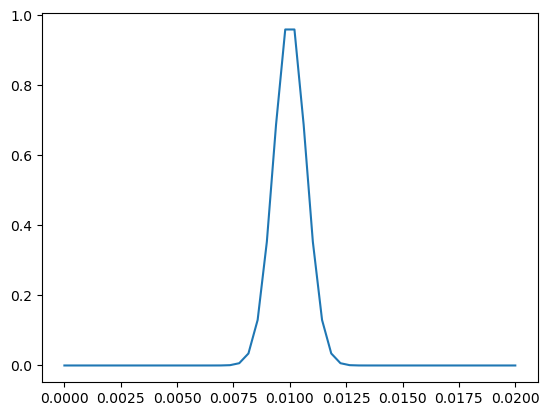

In [37]:
chan1, chan2 = solution.time_solution(time=5)
plt.plot(solution.position_values,chan1)
# plt.plot(solution.position_values,chan2)

In [4]:
phi1 = solution.eigenfunction_database.loc[0]
phi2 = solution.eigenfunction_database.loc[1]


In [5]:
A1right = np.zeros(len(phi1), dtype=np.complex128)
y = np.exp(-((solution.position_values-5e-3)/1e-3)**2)
channel = 0
z_start, z_stop = F1.channel_limits[channel]
inds = np.argwhere(np.logical_and(solution.position_values >= z_start,
                                  solution.position_values <= z_stop)).flatten()
inds


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [6]:
channel_solution = np.zeros(len(solution.position_values))
channel_solution[inds] = y[inds]

In [60]:
solution.eigenfunction_database.values.shape[0]

1

In [9]:
phi_1_right_k = [phi_1_right.coefficients[0] for phi_1_right in solution.eigenfunction_database.values[0,:]]

In [10]:
A1right +=np.fft.fft(channel_solution, norm='ortho')*np.conjugate(phi_1_right_k)

In [44]:
left, right = solution.channel_coefficients_vector(solution.eigenfunction_database.values[0,:])

In [46]:
feedline_circuit

In [47]:
# A1 = solution.get_timedomain_coefficients(y, left, 'left')
A1 = solution.get_timedomain_coefficients(y, right, 'right')
A1

array([ 6.14123927e-01+0.00000000e+00j,  1.88383564e-02-5.99446220e-01j,
       -5.57484022e-01-3.50739217e-02j, -4.66939951e-02+4.93970871e-01j,
        4.17018034e-01+5.26816291e-02j,  5.31254251e-02-3.35420733e-01j,
       -2.57041132e-01-4.90332184e-02j, -4.19485679e-02+1.87667105e-01j,
        1.30539116e-01+3.35167482e-02j,  2.51327263e-02-8.65074114e-02j,
       -5.46157847e-02-1.77457442e-02j, -1.18264771e-02+3.28493037e-02j,
        1.88220524e-02+7.45217771e-03j,  4.44584827e-03-1.02737492e-02j,
       -5.34194028e-03-2.51372629e-03j, -1.34811956e-03+2.64583360e-03j,
        1.24825431e-03+6.86233615e-04j,  3.31728282e-04-5.60921884e-04j,
       -2.40071195e-04-1.52353834e-04j, -6.65038436e-05+9.78572935e-05j,
        3.79869776e-05+2.75995697e-05j,  1.08935058e-05-1.40416061e-05j,
       -4.93951709e-06-4.09313142e-06j, -1.47494513e-06+1.64379648e-06j,
        4.82146675e-07+5.45776472e-07j,  3.21084996e-07-3.14018492e-17j,
        4.82146675e-07-5.45776472e-07j, -1.47494513

In [49]:
k = np.array(list(solution.eigenfunction_database.keys()))

In [50]:
c = 1e-3
t = 5
A1t = (A1right)*np.exp(-2j*np.pi*c*k*t)
A1t = (A1)*np.exp(-2j*np.pi*c*k*t)


In [51]:
A1t

array([ 6.14123927e-01+0.00000000e+00j, -5.98558702e-01-3.76581216e-02j,
        5.54181644e-01+7.00094227e-02j, -4.87384318e-01-9.29735310e-02j,
        4.07126964e-01+1.04532437e-01j, -3.22980500e-01-1.04942726e-01j,
        2.43300318e-01+9.63294106e-02j, -1.73996677e-01-8.18766211e-02j,
        1.18102713e-01+6.49275159e-02j, -7.60607138e-02-4.82695968e-02j,
        4.64589614e-02+3.37544112e-02j, -2.69012019e-02-2.22546097e-02j,
        1.47569721e-02+1.38577192e-02j, -7.66312157e-03-8.16039564e-03j,
        3.76323948e-03+4.54897510e-03j, -1.74542153e-03-2.40236664e-03j,
        7.63258025e-04+1.20270220e-03j, -3.13945605e-04-5.71064944e-04j,
        1.21063547e-04+2.57273176e-04j, -4.35551615e-05-1.10007995e-04j,
        1.45094904e-05+4.46567061e-05j, -4.41833888e-06-1.72137577e-05j,
        1.19690317e-06+6.30237865e-06j, -2.57631221e-07-2.19343478e-06j,
       -2.21399041e-08+7.27906037e-07j,  2.27041378e-07+2.27041378e-07j,
       -2.21399041e-08-7.27906037e-07j, -2.57631221

In [52]:
solution_region = np.zeros((len(solution.position_values)), dtype=np.complex128)
solution_region += np.fft.fft(A1t*phi_1_right_k, norm='ortho')


c:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


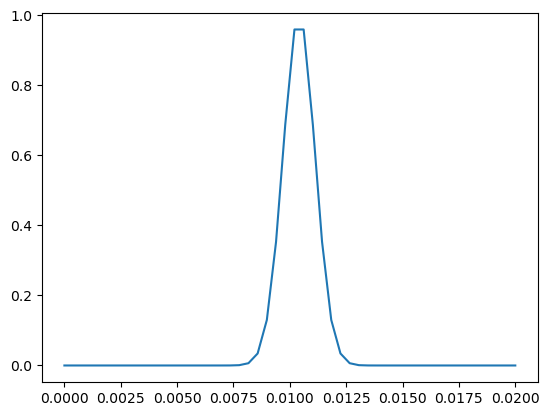

In [53]:
plt.plot(solution.position_values, solution_region)